In [1]:
from tensorflow import keras
import pathlib
import os
from IPython.display import Image, display
import numpy as np
from typing import Any

In [2]:
from tensorflow.keras.preprocessing import image

In [3]:
def display_image(data_path: str, folder_name: str, file_name: str) -> None:
    """
    Displays an image if it exists in the specified folder.

    Args:
    - data_path (str): Base directory path.
    - folder_name (str): Name of the folder where the image is located.
    - file_name (str): Name of the image file.
    """
    file_path = os.path.join(data_path, folder_name, file_name)

    if os.path.exists(file_path):
        # File exists, perform operations to display the image
        with open(file_path, 'rb') as file:
            display(Image(filename=file_path))
    else:
        print(f"The file {file_path} does not exist.")

In [4]:
def predict_image(data_path: str, folder_name: str, file_name: str, model) -> None:
    """
    Predicts whether the image is a pizza or not using a trained model.

    Args:
    - data_path (str): Base directory path.
    - folder_name (str): Name of the folder where the image is located.
    - file_name (str): Name of the image file.
    - model: Trained model used for prediction.
    """
    file_path = os.path.join(data_path, folder_name, file_name)

    if os.path.exists(file_path):
        # File exists, perform operations to make predictions
        img = preprocess_images(file_path)
        prediction = model.predict(img)
        print(prediction)

        if prediction > 0.5:
            print("It's a pizza!")
        else:
            print("Not a pizza.")
    else:
        print(f"The file {file_path} does not exist.")

In [5]:
def preprocess_images(path: str) -> Any:
    """
    Preprocesses an image given its file path.

    Args:
    - path (str): File path of the image.

    Returns:
    - Any: Preprocessed image data.
    """
    img = image.load_img(path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_preprocessed = img_array / 255.0

    return img_preprocessed

In [6]:
models_path = pathlib.Path(r"C:\Users\KonuTech\machine-learning-zoomcamp-capstone-02\models")
model_filename = "model_xception_2024-01-06_22-44-37.keras"

#### Load a model

In [7]:
model_path = models_path / model_filename  # Construct the full path to the model file

if model_path.exists():
    model = keras.models.load_model(model_path)
    print(f"Model loaded successfully from: {model_path}")
else:
    print(f"Model file not found at: {model_path}")

Model loaded successfully from: C:\Users\KonuTech\machine-learning-zoomcamp-capstone-02\models\model_xception_2024-01-06_22-44-37.keras


#### Not a pizza example

In [8]:
data_path = r"C:\Users\KonuTech\machine-learning-zoomcamp-capstone-02\data\pizza_not_pizza"
file_name = "1054362.jpg"
folder_name="not_pizza"

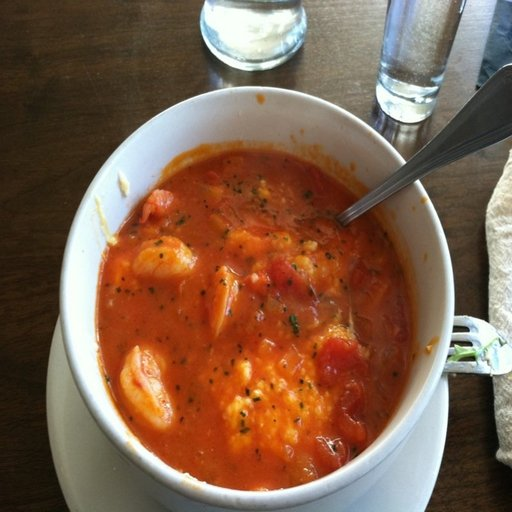

In [9]:
display_image(data_path=data_path, folder_name=folder_name, file_name=file_name)

In [10]:
predict_image(data_path=data_path, folder_name=folder_name, file_name=file_name, model=model)

[[0.04642364]]
Not a pizza.


#### A pizza example

In [11]:
data_path = r"C:\Users\KonuTech\machine-learning-zoomcamp-capstone-02\data\pizza_not_pizza"
file_name = "1008104.jpg"
folder_name="pizza"

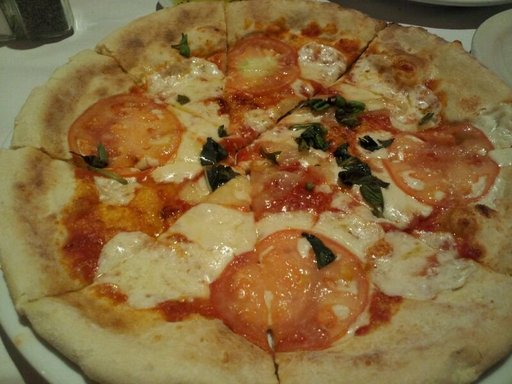

In [12]:
display_image(data_path=data_path, folder_name=folder_name, file_name=file_name)

In [13]:
predict_image(data_path=data_path, folder_name=folder_name, file_name=file_name, model=model)

[[0.9999436]]
It's a pizza!
